## SIMILARITY MEASURE
It will be a weighted average of similarity scores which takes into account topological features of the graph and content of nodes labels.

**Similairty scores** compare any node of G1 to any node of G2 and assign a score based on:
- type of nodes (need to define some rules)
- content of the labels (contextul similarity using SBERT model)
- distance from closest start/end nodes

In [9]:
import os
import random 

from similarity_utils import *
from parser_with_lane import get_edge_df_from_bpmn

In [10]:
#Load model
#model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')#all-mpnet-base-v2')
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

c:\Users\maria\anaconda3\envs\SNA_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
def check_file_similarity(file1, file2, model, verbose=False):
    edge_df1 = get_edge_df_from_bpmn(file1)
    edge_df2 = get_edge_df_from_bpmn(file2)

    G1 = obtain_graph(edge_df1)
    G2 = obtain_graph(edge_df2)

    if verbose:
        print(f"Graph 1 has:", G1.number_of_nodes(), "nodes and", G1.number_of_edges(), "edges")
        print(f"Graph 2 has:", G2.number_of_nodes(), "nodes and", G2.number_of_edges(), "edges")

    _, _, _, _, similarity_matrix = get_similarity_matrix(G1, G2, model)
    return get_similarity_measure(similarity_matrix)

In [18]:
# Load a subset of 12 folders from the base path
def load_files_from_folders(base_path, subset_size=2):
    folders = {}
    # List all folders in the base directory
    all_folders = [folder_name for folder_name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder_name))]
    
    # Select a random subset of 12 folders
    selected_folders = random.sample(all_folders, min(subset_size, len(all_folders)))

    # Load files from the selected folders
    for folder_name in selected_folders:
        folder_path = os.path.join(base_path, folder_name)
        files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        folders[folder_name] = files

    return folders

In [19]:
folders = load_files_from_folders('dati\\bpmn')
all_files = [file for folder in folders.values() for file in folder]
all_files = [file for file in all_files if file.endswith('.xml')]

In [12]:
# consider all finles, but 'dati\\bpmn\\R_j03\\2.bpmn2.xml'
all_files = [file for file in all_files if file != 'dati\\bpmn\\R_j03\\2.bpmn2.xml']

In [20]:
all_files

['dati\\bpmn\\M_g02\\0.bpmn2.xml',
 'dati\\bpmn\\M_g02\\1.bpmn2.xml',
 'dati\\bpmn\\M_g02\\2.bpmn2.xml',
 'dati\\bpmn\\M_g02\\3.bpmn2.xml',
 'dati\\bpmn\\M_g02\\4.bpmn2.xml',
 'dati\\bpmn\\M_g02\\6.bpmn2.xml',
 'dati\\bpmn\\M_g02\\7.bpmn2.xml',
 'dati\\bpmn\\M_g02\\8.bpmn2.xml',
 'dati\\bpmn\\M_g02\\9.bpmn2.xml',
 'dati\\bpmn\\V_k08\\0.bpmn2.xml',
 'dati\\bpmn\\V_k08\\1.bpmn2.xml',
 'dati\\bpmn\\V_k08\\2.bpmn2.xml',
 'dati\\bpmn\\V_k08\\3.bpmn2.xml',
 'dati\\bpmn\\V_k08\\4.bpmn2.xml',
 'dati\\bpmn\\V_k08\\5.bpmn2.xml',
 'dati\\bpmn\\V_k08\\6.bpmn2.xml']

In [21]:
# Compute similarity between all files
similarity_matrix = np.zeros((len(all_files), len(all_files)))
for i in range(len(all_files)):
    for j in range(i, len(all_files)):
        similarity_matrix[i, j] = check_file_similarity(all_files[i], all_files[j], model)
        similarity_matrix[j, i] = similarity_matrix[i, j]

Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 2 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 processes in the BPMN file
Detected 1 p

KeyboardInterrupt: 

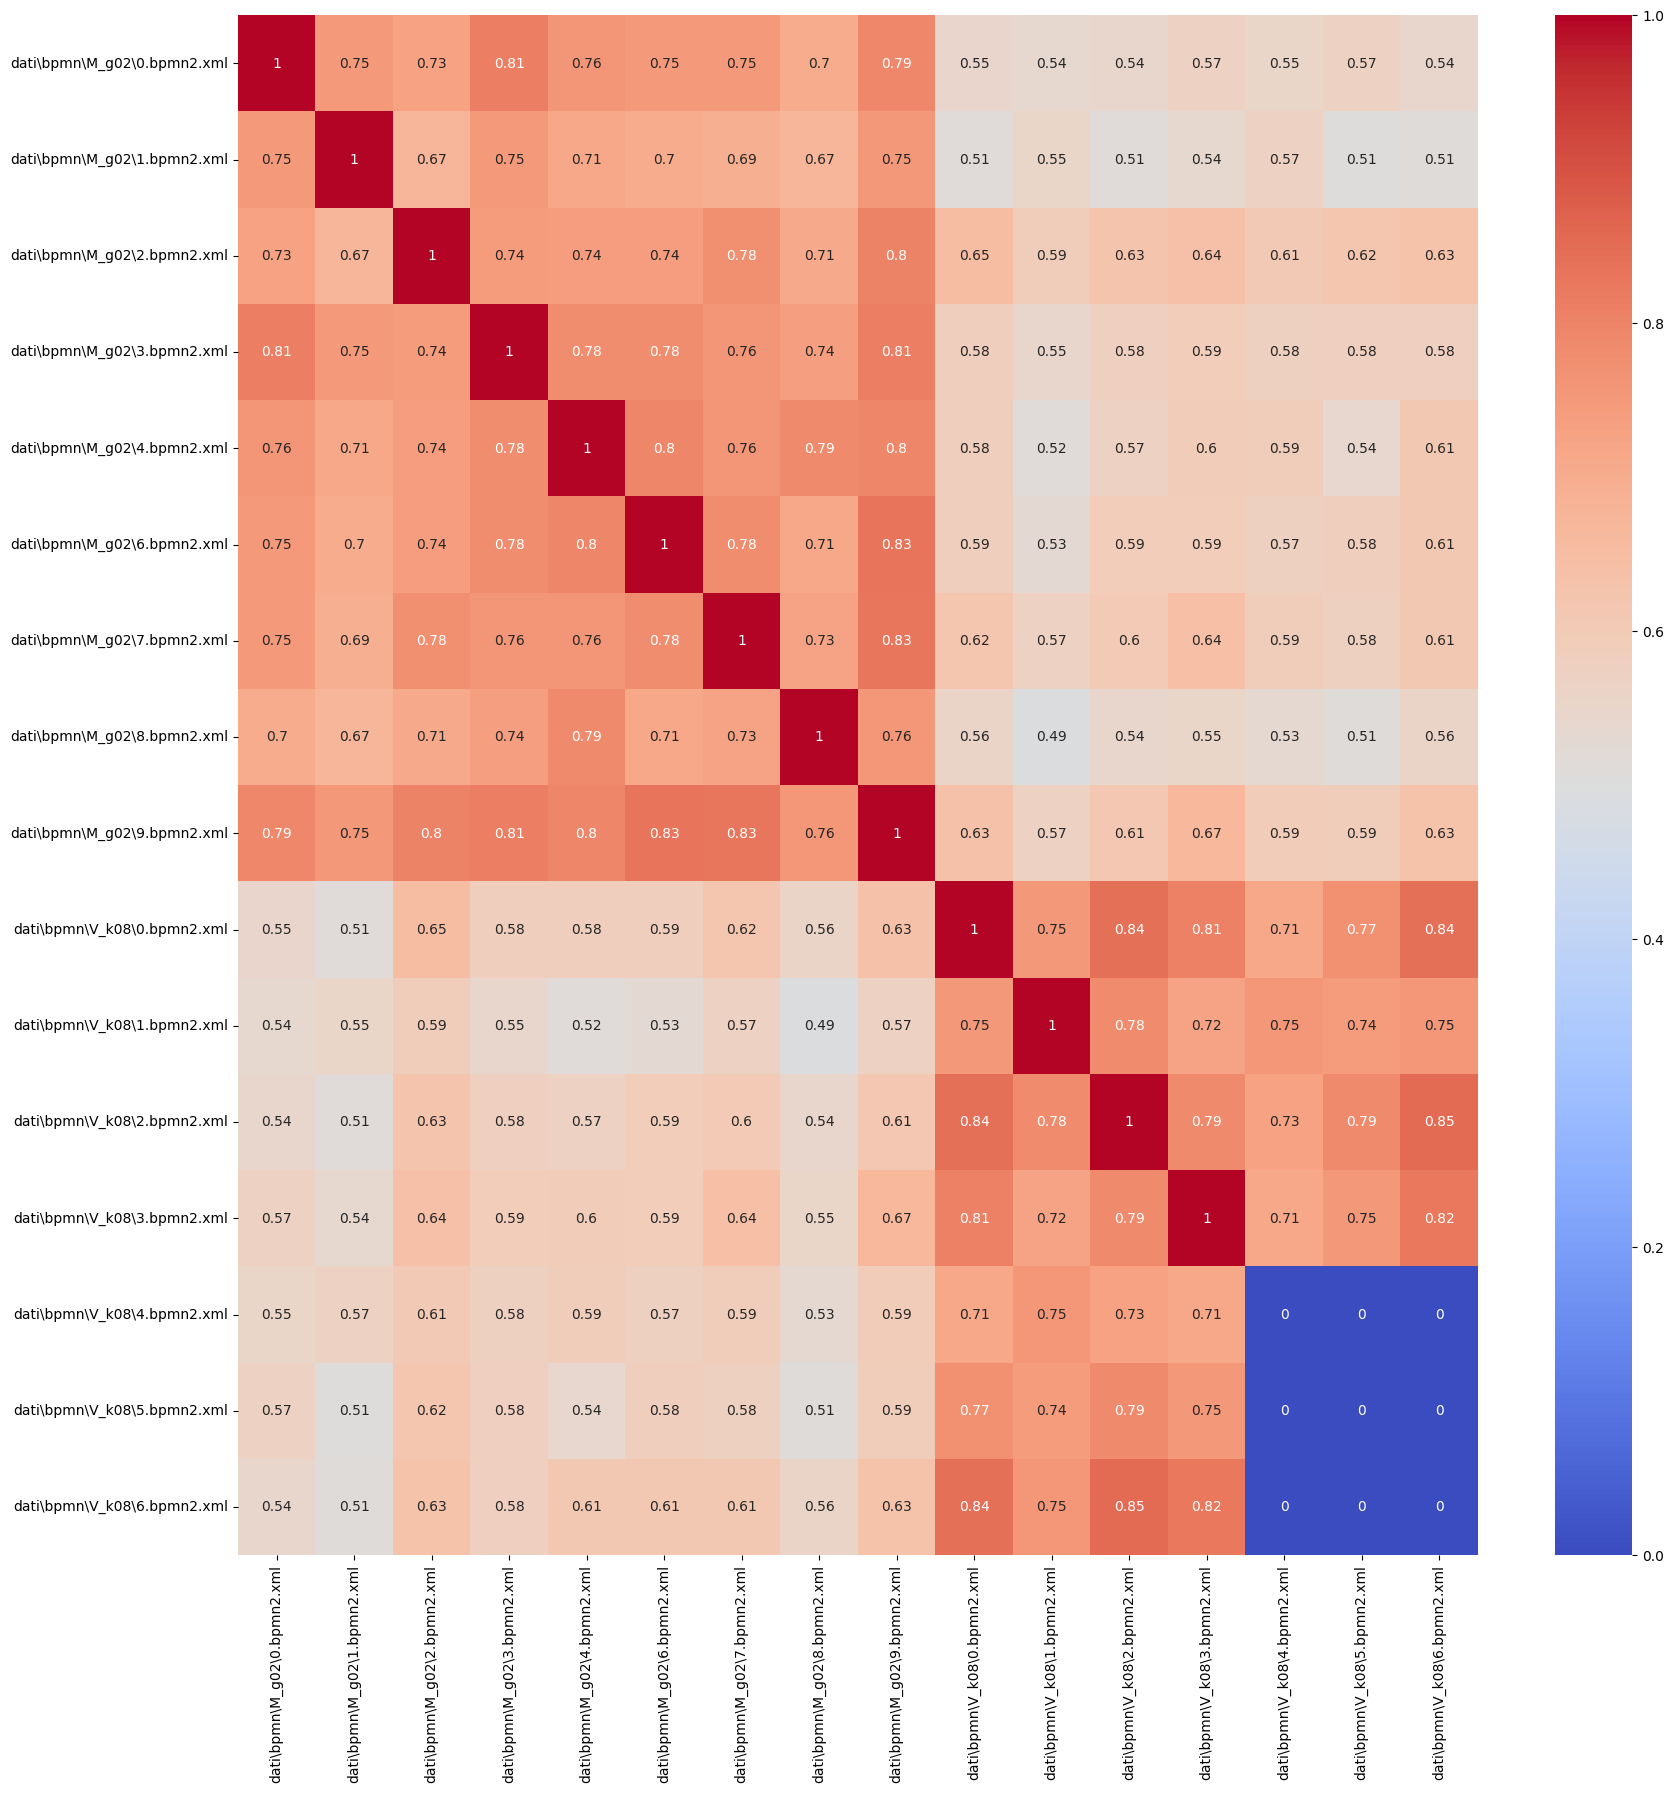

In [22]:
# plot the similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(similarity_matrix, annot=True, xticklabels=all_files, yticklabels=all_files, cmap='coolwarm')
plt.show()
